## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [7]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train.astype('float32') 
x_test=x_test.astype('float32')

In [0]:
x_train/= 255
x_test/= 255



### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:

    # Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model.fit(x_train, trainY, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, testY), callbacks=callback_list)
    



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.3783 - acc: 0.8639 - val_loss: 0.3004 - val_acc: 0.8923
Epoch 2/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.2332 - acc: 0.9137 - val_loss: 0.2635 - val_acc: 0.9062
Epoch 3/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.1717 - acc: 0.9358 - val_loss: 0.2382 - val_acc: 0.9174
Epoch 4/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.1223 - acc: 0.9546 - val_loss: 0.2505 - val_acc: 0.9165
Epoch 5/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0845 - acc: 0.9682 - val_loss: 0.3143 - val_acc: 0.9118
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0572 - acc: 0.9787 - val_loss: 0.3565 - val_acc: 0.9110
Epoch 7/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0407 - acc: 0.9854 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [14]:

    # Define Model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))

    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model.add(Dropout(0.25))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    
    # More Dropout
    model.add(Dropout(0.5))

    # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model.fit(x_train, trainY, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, testY), callbacks=callback_list)
    


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.5124 - acc: 0.8153 - val_loss: 0.3254 - val_acc: 0.8813
Epoch 2/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.3488 - acc: 0.8737 - val_loss: 0.2838 - val_acc: 0.8935
Epoch 3/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.2978 - acc: 0.8920 - val_loss: 0.2517 - val_acc: 0.9058
Epoch 4/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.2631 - acc: 0.9042 - val_loss: 0.2545 - val_acc: 0.9050
Epoch 5/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.2412 - acc: 0.9107 - val_loss: 0.2286 - val_acc: 0.9186
Epoch 6/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.2248 - acc: 0.9172 - val_loss: 0.2208 - val_acc: 0.9193
Epoch 7/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.2097 - acc: 0.9226 - val_loss: 0.

From the above two models we can see that the accuray has increased and we can see a reduction in loss after adding the max pool and drop out

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

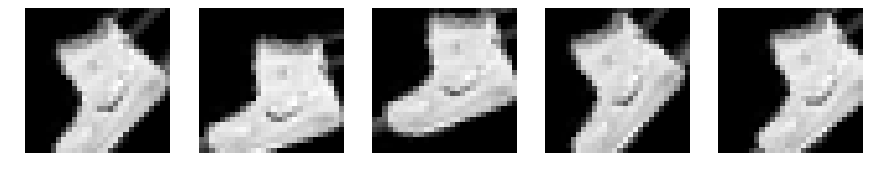

In [16]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [18]:
model.fit_generator(datagen.flow(x_train, trainY, batch_size=32),
	validation_data=(x_test, testY), steps_per_epoch=100,
	epochs=10)

Epoch 1/10
100/100 [==============================] - 2s 18ms/step - loss: 1.5523 - acc: 0.4706 - val_loss: 0.4125 - val_acc: 0.8643
Epoch 2/10
100/100 [==============================] - 2s 19ms/step - loss: 1.1528 - acc: 0.5747 - val_loss: 0.3616 - val_acc: 0.8747
Epoch 3/10
100/100 [==============================] - 2s 20ms/step - loss: 1.0220 - acc: 0.6138 - val_loss: 0.3777 - val_acc: 0.8624
Epoch 4/10
100/100 [==============================] - 2s 20ms/step - loss: 0.9588 - acc: 0.6428 - val_loss: 0.3352 - val_acc: 0.8853
Epoch 5/10
100/100 [==============================] - 2s 20ms/step - loss: 0.9698 - acc: 0.6366 - val_loss: 0.3776 - val_acc: 0.8681
Epoch 6/10
100/100 [==============================] - 2s 21ms/step - loss: 0.8943 - acc: 0.6681 - val_loss: 0.3617 - val_acc: 0.8729
Epoch 7/10
100/100 [==============================] - 2s 21ms/step - loss: 0.8709 - acc: 0.6772 - val_loss: 0.3509 - val_acc: 0.8777
Epoch 8/10
100/100 [==============================] - 2s 20ms/step - 

###  Report the final train and validation accuracy

In [19]:
model.evaluate(x_train,trainY)

60000/60000 [==============================] - 5s 81us/step


[0.2802559164981047, 0.898]

In [20]:
model.evaluate(x_test,testY)

10000/10000 [==============================] - 1s 80us/step


[0.3457014393210411, 0.8791]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [33]:
x_train[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [34]:
print("x train shape ",x_train.shape)
print("y train shape ",y_train.shape)
print("x test shape ",x_test.shape)
print("y test shape ",y_test.shape)

x train shape  (50000, 32, 32, 3)
y train shape  (50000, 1)
x test shape  (10000, 32, 32, 3)
y test shape  (10000, 1)


In [0]:
x_train=x_train.astype('float32') 
x_test=x_test.astype('float32')

In [0]:
x_train/= 255
x_test/= 255

In [39]:
x_train.shape[0]

50000

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

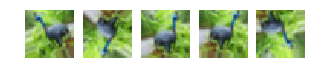

In [56]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
gen = datagen.flow(x_train[6:7], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()